In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from ising import monte_carlo_metropolis
import matplotlib
from matplotlib import pyplot as plt
from timeit import timeit
import matplotlib.animation as animation

In [3]:
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath} \usepackage{amssymb} \usepackage{physics}"
plt.rcParams["font.family"] = "Fira Math"

In [4]:
# Critical value
betac = np.log(1.0 + np.sqrt(2)) / 2.0

In [12]:
output_high_T = monte_carlo_metropolis(
    n=60, beta=0.01 * betac, h=0.0, max_steps=200, initial_state=0, method="checkerboard", store_history=True
)
output_low_T = monte_carlo_metropolis(
    n=60, beta=10 * betac, h=0.005, max_steps=200, initial_state=0, method="checkerboard", store_history=True
)

In [13]:
colors = ["dodgerblue", "lightcoral"]


def plot_lattice(lattice, ax):
    cmap = matplotlib.colors.ListedColormap(colors)
    m = ax.imshow(lattice, cmap=cmap, vmin=-1, vmax=1)
    patches = [matplotlib.patches.Patch(color=colors[i], label=f"Spin {x}") for i, x in enumerate(["down", "up"])]
    ax.legend(handles=patches, loc="lower center", ncol=2)
    return m

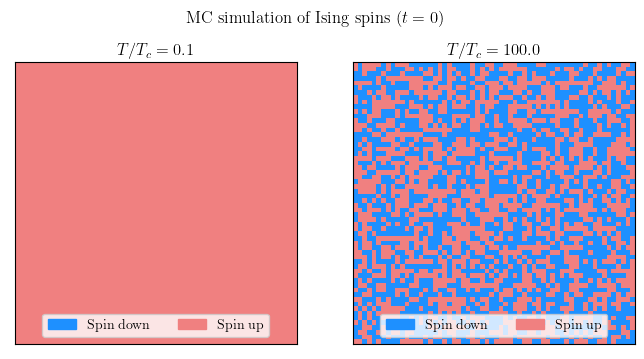

In [16]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
# ax.set_xlabel("x")
# ax.set_ylabel("y")
[ax.set_xticks([]) for ax in axs]
[ax.set_yticks([]) for ax in axs]

fig.suptitle("MC simulation of Ising spins ($t = 0$)")
axs[0].set_title(f"$T/T_c = {np.round(betac/output_low_T['beta'],2)}$")
axs[1].set_title(f"$T/T_c = {np.round(betac/output_high_T['beta'],2)}$")
m1 = plot_lattice(output_low_T["lattice_history"][-1], axs[0])
m2 = plot_lattice(output_high_T["lattice_history"][-1], axs[1])

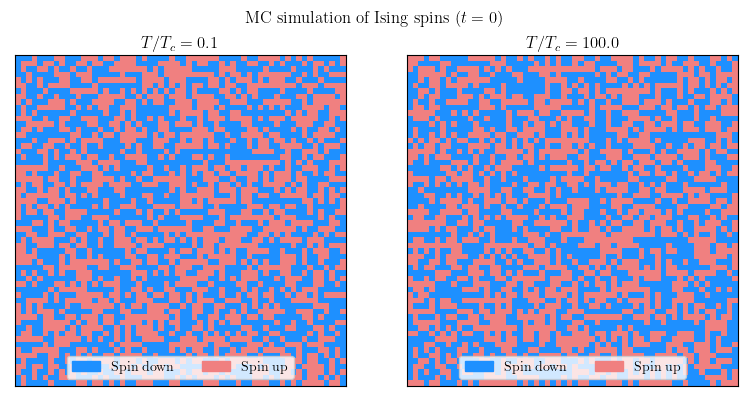

In [17]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
# ax.set_xlabel("x")
# ax.set_ylabel("y")
[ax.set_xticks([]) for ax in axs]
[ax.set_yticks([]) for ax in axs]

fig.suptitle("MC simulation of Ising spins ($t = 0$)")
axs[0].set_title(f"$T/T_c = {np.round(betac/output_low_T['beta'],2)}$")
axs[1].set_title(f"$T/T_c = {np.round(betac/output_high_T['beta'],2)}$")
m1 = plot_lattice(output_low_T["lattice_history"][0], axs[0])
m2 = plot_lattice(output_high_T["lattice_history"][0], axs[1])
fig.tight_layout()
fig.savefig("figs/static_mc_spins.png", dpi=300)

In [18]:
def update(i):
    fig.suptitle(f"MC simulation of Ising spins ($t = {i}$)")
    m1.set_array(output_low_T["lattice_history"][i])
    m2.set_array(output_high_T["lattice_history"][i])
    return fig, m1, m2


animation_fig = animation.FuncAnimation(
    fig,
    update,
    # frames=len(output_low_T['lattice_history']),
    frames=60,
    interval=200,
    blit=True,
    repeat_delay=2_000,
)

In [19]:
animation_fig.save("figs/animated_mc_spins.gif", dpi=300)